In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [4]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# SKlearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer

# SKlearn
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D

# SKlearn
from sklearn.cluster import AgglomerativeClustering

from matplotlib.colors import ListedColormap

# SKlearn
from sklearn import metrics

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

* kaggle link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

The goal of this notebook is prepare the data by cleaning it and Preprocessing it before we can do any machine learning specifically clustering for segmentation. 

# Machine Learning | Unsupervived | Clustering
In this project, I hope to perform an unsupervised clustering of data on the customer's records from a groceries firm's database. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.

### Read Data

In [5]:
data = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv', sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
data.shape

(2240, 29)

In [7]:
# see some stats
data.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [8]:
# get columns names
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Data Cleaning

In [9]:
# data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
# Check for null data
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

* Income is missing some data - drop the na values
* Conver dt_customer to datetime (string right now)

In [11]:
data = data.dropna()
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [12]:
import datetime
data['Dt_Customer']= pd.to_datetime(data['Dt_Customer'],dayfirst=True)
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


-  let's only add the month column


In [13]:
# insert a new month column
data['Dt_Cust_Month'] = data['Dt_Customer'].dt.month
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Cust_Month
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,9
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,8
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,6
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,6
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,1


In [14]:
# check for unique values in each column

for i in data.columns:
    print (f"In the",i,"there are:",data.loc[:,i].nunique())

In the ID there are: 2216
In the Year_Birth there are: 59
In the Education there are: 5
In the Marital_Status there are: 8
In the Income there are: 1974
In the Kidhome there are: 3
In the Teenhome there are: 3
In the Dt_Customer there are: 662
In the Recency there are: 100
In the MntWines there are: 776
In the MntFruits there are: 158
In the MntMeatProducts there are: 554
In the MntFishProducts there are: 182
In the MntSweetProducts there are: 176
In the MntGoldProds there are: 212
In the NumDealsPurchases there are: 15
In the NumWebPurchases there are: 15
In the NumCatalogPurchases there are: 14
In the NumStorePurchases there are: 14
In the NumWebVisitsMonth there are: 16
In the AcceptedCmp3 there are: 2
In the AcceptedCmp4 there are: 2
In the AcceptedCmp5 there are: 2
In the AcceptedCmp1 there are: 2
In the AcceptedCmp2 there are: 2
In the Complain there are: 2
In the Z_CostContact there are: 1
In the Z_Revenue there are: 1
In the Response there are: 2
In the Dt_Cust_Month there are:

In [15]:
# change to categorical

change = ['Education','Marital_Status','Kidhome','Teenhome','AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue']

for i in change:
    data[i] = data[i].astype('object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   object        
 6   Teenhome             2216 non-null   object        
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

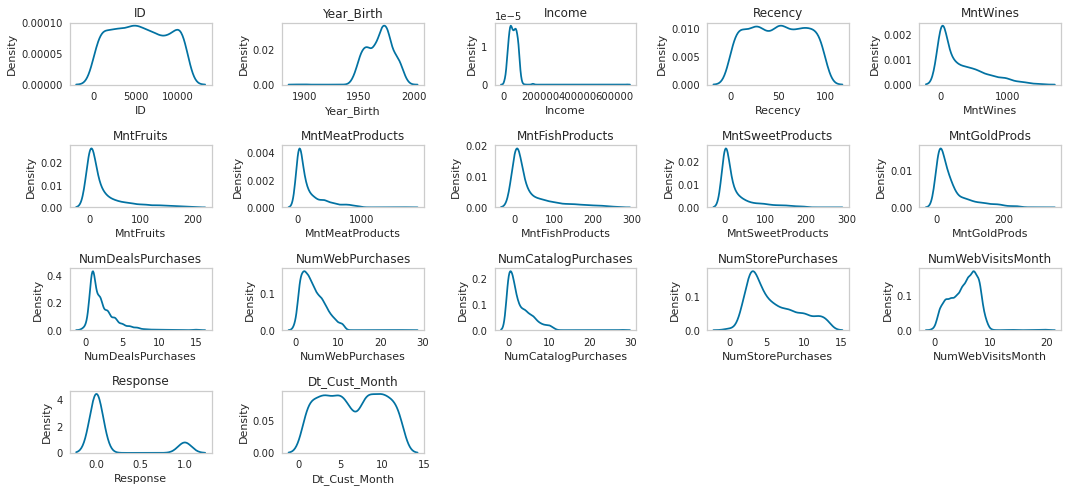

In [17]:
# let's visualize our entire data, numerical values 

num=data.select_dtypes(include=np.number).columns
len(num)
plt.rcParams['figure.figsize']=[15,7]
r=4
c=5
it=1
for i in num:
    plt.subplot(r,c,it)
    sns.distplot(data.loc[:,i],hist=False)
    plt.title(i)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

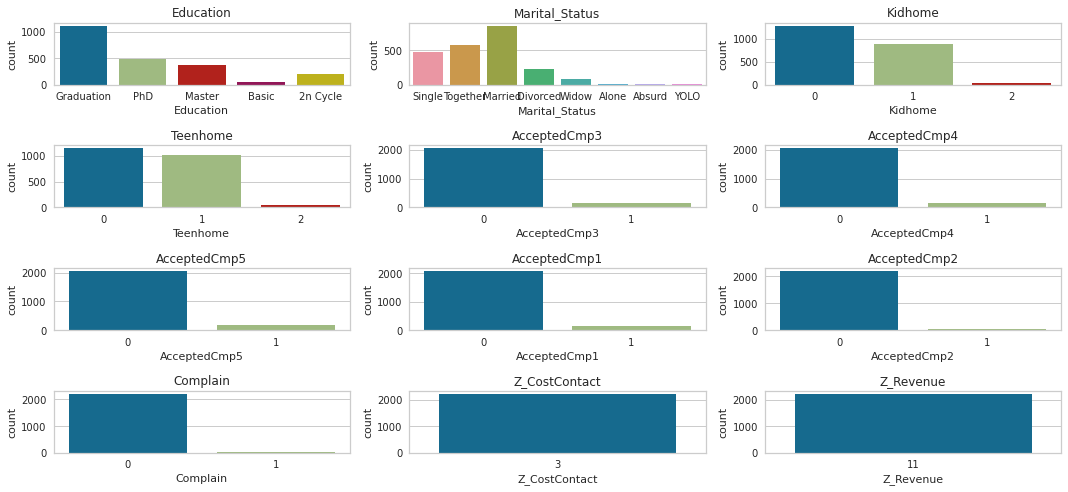

In [18]:
# categorical values

cat=data.select_dtypes(include='object').columns
len(cat)

r=4
c=3
it=1
for i in cat:
    plt.subplot(r,c,it)
    sns.countplot(data.loc[:,i])
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

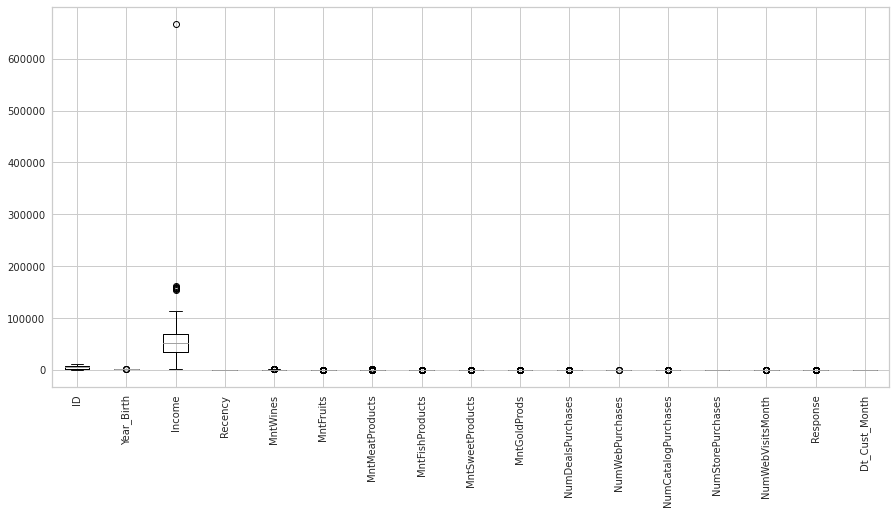

In [19]:
# review outliers - This is a great way to see the outliers

data.boxplot()
plt.xticks(rotation=90)
plt.show()

The total number of data-points after removing the outliers are: 2215


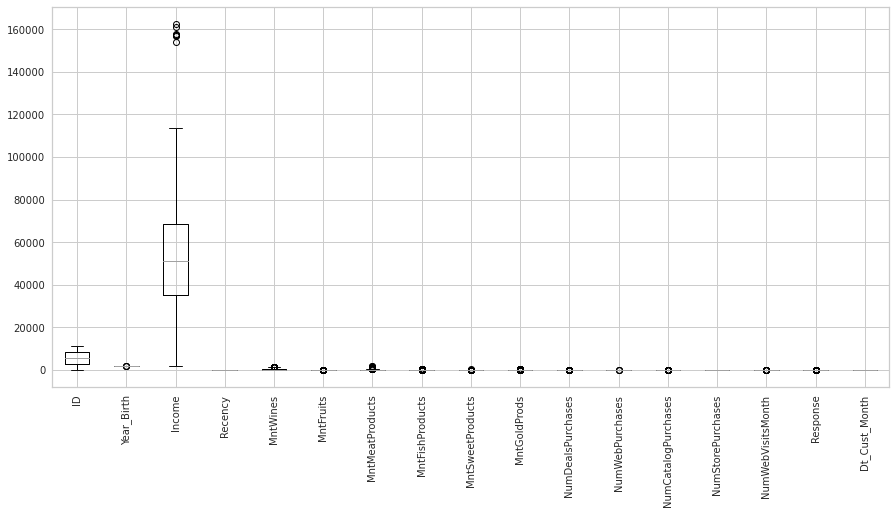

In [20]:
# remove the outliers from the income column
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

data.boxplot()
plt.xticks(rotation=90)
plt.show()

## PRE-PROCESSING

In [25]:
y = data['Response'] # y is the machine learning output

x = data.drop('Response',axis=1) # new data without the response

In [33]:
# create a new feature to find out the age
from datetime import datetime
from datetime import date

data["Age"] = datetime.now().year - data['Year_Birth']
data = data.drop('Year_Birth', axis = 1)
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Cust_Month,Age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,3,11,1,9,66
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,3,11,0,3,69
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,3,11,0,8,58
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,3,11,0,2,39
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,3,11,0,1,42


<AxesSubplot:>

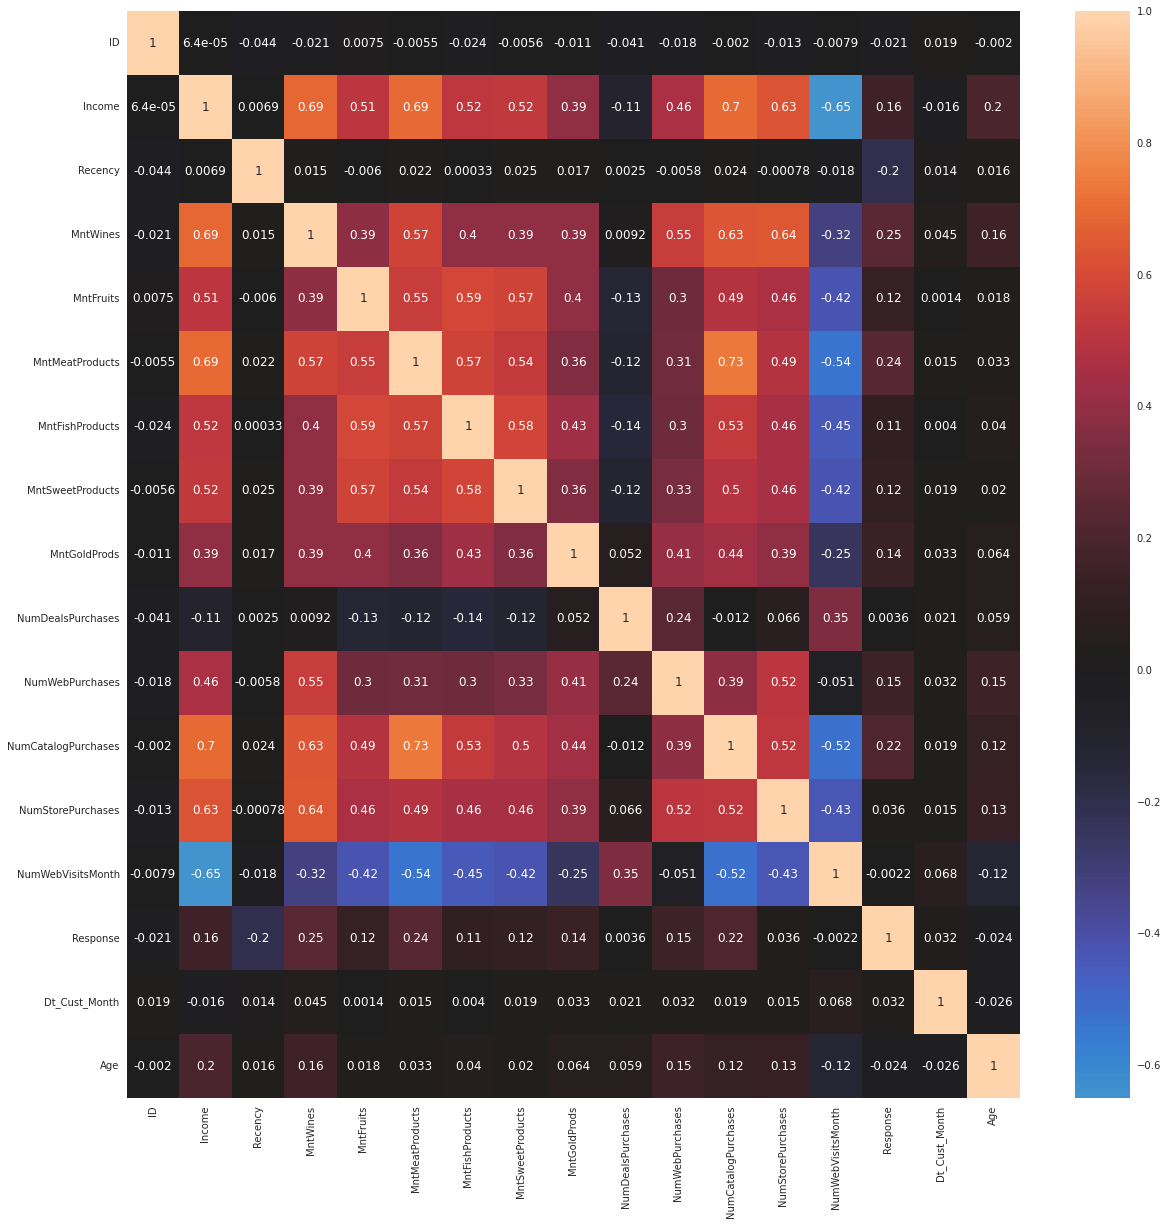

In [34]:
# visualize a heatmap
corrmat = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot = True, center= 0)

In [26]:
x_cat = x.select_dtypes(include='object')
x_cat.head()

,Education,Marital_Status,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,Graduation,Single,0,0,0,0,0,0,0,0,3,11
1,Graduation,Single,1,1,0,0,0,0,0,0,3,11
2,Graduation,Together,0,0,0,0,0,0,0,0,3,11
3,Graduation,Together,1,0,0,0,0,0,0,0,3,11
4,PhD,Married,1,0,0,0,0,0,0,0,3,11


In [27]:
# get some stats from the categorical values
x_cat.describe().T

,count,unique,top,freq
Education,2215,5,Graduation,1115
Marital_Status,2215,8,Married,857
Kidhome,2215,3,0,1283
Teenhome,2215,3,0,1146
AcceptedCmp3,2215,2,0,2052
AcceptedCmp4,2215,2,0,2051
AcceptedCmp5,2215,2,0,2053
AcceptedCmp1,2215,2,0,2073
AcceptedCmp2,2215,2,0,2185
Complain,2215,2,0,2194


In [28]:
# need to drop 'Z_CostContact' and 'Z_Revenue'
x_cat = x_cat.drop(columns=['Z_CostContact','Z_Revenue'],axis=1)
x_cat.head()

,Education,Marital_Status,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,Graduation,Single,0,0,0,0,0,0,0,0
1,Graduation,Single,1,1,0,0,0,0,0,0
2,Graduation,Together,0,0,0,0,0,0,0,0
3,Graduation,Together,1,0,0,0,0,0,0,0
4,PhD,Married,1,0,0,0,0,0,0,0


In [29]:
# unique values
for i in x_cat.columns:
    print("The no.of unique values in",i,"are: ",x_cat.loc[:,i].nunique())

The no.of unique values in Education are:  5
The no.of unique values in Marital_Status are:  8
The no.of unique values in Kidhome are:  3
The no.of unique values in Teenhome are:  3
The no.of unique values in AcceptedCmp3 are:  2
The no.of unique values in AcceptedCmp4 are:  2
The no.of unique values in AcceptedCmp5 are:  2
The no.of unique values in AcceptedCmp1 are:  2
The no.of unique values in AcceptedCmp2 are:  2
The no.of unique values in Complain are:  2


In [30]:
# get percents for values in the data
freq_marital = x_cat['Marital_Status'].value_counts(normalize=True)
freq_marital

Married     0.386907
Together    0.258239
Single      0.212641
Divorced    0.104740
Widow       0.034312
Alone       0.001354
Absurd      0.000903
YOLO        0.000903
Name: Marital_Status, dtype: float64

In [31]:
# make the value of marital_status a numerical value for modelling
x_cat['Marital_Status'] = x_cat['Marital_Status'].map(freq_marital)
x_cat.head()

,Education,Marital_Status,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,Graduation,0.212641,0,0,0,0,0,0,0,0
1,Graduation,0.212641,1,1,0,0,0,0,0,0
2,Graduation,0.258239,0,0,0,0,0,0,0,0
3,Graduation,0.258239,1,0,0,0,0,0,0,0
4,PhD,0.386907,1,0,0,0,0,0,0,0


In [32]:
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Education       2215 non-null   object 
 1   Marital_Status  2215 non-null   float64
 2   Kidhome         2215 non-null   object 
 3   Teenhome        2215 non-null   object 
 4   AcceptedCmp3    2215 non-null   object 
 5   AcceptedCmp4    2215 non-null   object 
 6   AcceptedCmp5    2215 non-null   object 
 7   AcceptedCmp1    2215 non-null   object 
 8   AcceptedCmp2    2215 non-null   object 
 9   Complain        2215 non-null   object 
dtypes: float64(1), object(9)
memory usage: 190.4+ KB


In [35]:
# get dummy values for each unique value in our category
dummies=pd.get_dummies(x_cat[['Education','Kidhome','Teenhome']],drop_first=True)
dummies.head()


,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Kidhome_1,Kidhome_2,Teenhome_1,Teenhome_2
0,0,1,0,0,0,0,0,0
1,0,1,0,0,1,0,1,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0
4,0,0,0,1,1,0,0,0


In [36]:
# concat the two tables
x_cat=pd.concat([x_cat,dummies],axis=1)
x_cat.head()

,Education,Marital_Status,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Kidhome_1,Kidhome_2,Teenhome_1,Teenhome_2
0,Graduation,0.212641,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Graduation,0.212641,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,Graduation,0.258239,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Graduation,0.258239,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,PhD,0.386907,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [37]:
# drop categorical columns
x_cat = x_cat.drop(columns=['Education','Kidhome','Teenhome'],axis=1)
x_cat.head()

,Marital_Status,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Kidhome_1,Kidhome_2,Teenhome_1,Teenhome_2
0,0.212641,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.212641,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,0.258239,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.258239,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0.386907,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [38]:
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marital_Status        2215 non-null   float64
 1   AcceptedCmp3          2215 non-null   object 
 2   AcceptedCmp4          2215 non-null   object 
 3   AcceptedCmp5          2215 non-null   object 
 4   AcceptedCmp1          2215 non-null   object 
 5   AcceptedCmp2          2215 non-null   object 
 6   Complain              2215 non-null   object 
 7   Education_Basic       2215 non-null   uint8  
 8   Education_Graduation  2215 non-null   uint8  
 9   Education_Master      2215 non-null   uint8  
 10  Education_PhD         2215 non-null   uint8  
 11  Kidhome_1             2215 non-null   uint8  
 12  Kidhome_2             2215 non-null   uint8  
 13  Teenhome_1            2215 non-null   uint8  
 14  Teenhome_2            2215 non-null   uint8  
dtypes: float64(1), object

In [39]:
x_cat.columns

Index(['Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Kidhome_1', 'Kidhome_2', 'Teenhome_1', 'Teenhome_2'],
      dtype='object')

In [40]:
# make sure everything is an integer
change2=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Kidhome_1', 'Kidhome_2', 'Teenhome_1', 'Teenhome_2']

for i in change2:
    x_cat[i] = x_cat[i].astype('int')

In [43]:
x_cat.head()

,Marital_Status,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Kidhome_1,Kidhome_2,Teenhome_1,Teenhome_2
0,0.212641,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.212641,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,0.258239,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.258239,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0.386907,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [44]:
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marital_Status        2215 non-null   float64
 1   AcceptedCmp3          2215 non-null   int64  
 2   AcceptedCmp4          2215 non-null   int64  
 3   AcceptedCmp5          2215 non-null   int64  
 4   AcceptedCmp1          2215 non-null   int64  
 5   AcceptedCmp2          2215 non-null   int64  
 6   Complain              2215 non-null   int64  
 7   Education_Basic       2215 non-null   int64  
 8   Education_Graduation  2215 non-null   int64  
 9   Education_Master      2215 non-null   int64  
 10  Education_PhD         2215 non-null   int64  
 11  Kidhome_1             2215 non-null   int64  
 12  Kidhome_2             2215 non-null   int64  
 13  Teenhome_1            2215 non-null   int64  
 14  Teenhome_2            2215 non-null   int64  
dtypes: float64(1), int64(

* Next step:
standardize the features and then model build